In [8]:
import pandas as pd

df = pd.read_csv('respiratorycharting.csv')
print(df.isnull().sum())


respchartid               0
patientunitstayid         0
respchartoffset           0
respchartentryoffset      0
respcharttypecat          0
respchartvaluelabel       0
respchartvalue          125
dtype: int64


In [5]:
print(df.isnull().sum())

respchartid               0
patientunitstayid         0
respchartoffset           0
respchartentryoffset      0
respcharttypecat          0
respchartvaluelabel       0
respchartvalue          125
dtype: int64


In [7]:
# Fill missing numeric values with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [9]:
# Convert 'respchartvalue' to numeric
df['respchartvalue'] = pd.to_numeric(df['respchartvalue'], errors='coerce')
df['respchartvalue'] = df['respchartvalue'].fillna(df['respchartvalue'].median())

        respchartid  patientunitstayid  respchartoffset  respchartentryoffset  \
count  1.760890e+05       1.760890e+05    176089.000000         176089.000000   
mean   1.260332e+08       1.891008e+06      7168.550244           7184.081419   
std    7.654253e+07       1.026092e+06      9498.976967           9493.894538   
min    1.070000e+02       1.438700e+05    -24147.000000         -24147.000000   
25%    5.667673e+07       9.100500e+05      1181.000000           1197.000000   
50%    1.352144e+08       1.998890e+06      3826.000000           3839.000000   
75%    1.863991e+08       2.873230e+06      9481.000000           9484.000000   
max    2.555675e+08       3.352333e+06     74892.000000          74892.000000   

       respchartvalue  respchartvalue_scaled  
count    1.651460e+05           1.651460e+05  
mean     2.694952e+02          -5.076965e-18  
std      1.109454e+04           1.000003e+00  
min     -3.000000e+00          -2.456127e-02  
25%      8.000000e+00          -2.3

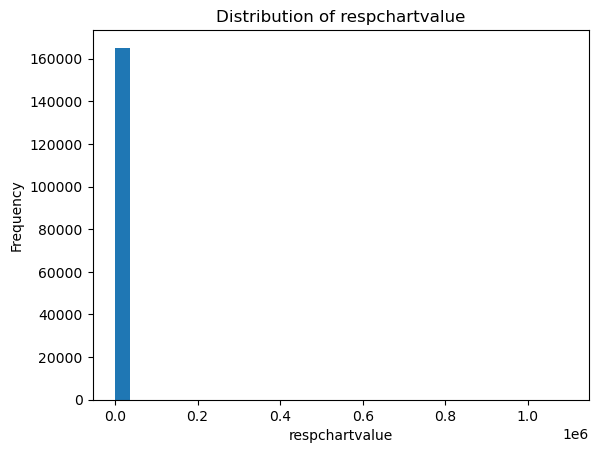

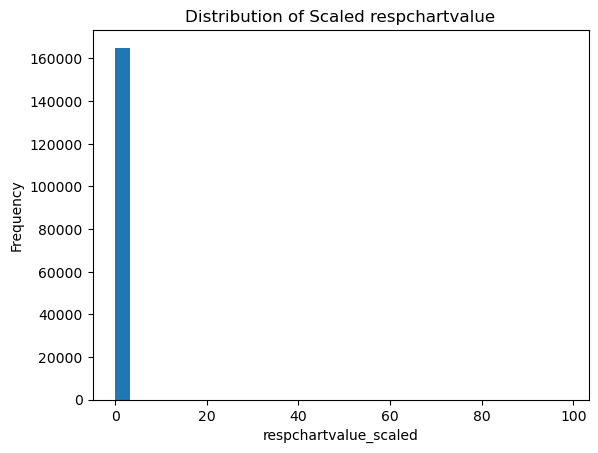

In [13]:
# Basic statistics and distribution
print(df.describe())

# Check the distribution of a key variable (e.g., respchartvalue)
import matplotlib.pyplot as plt

plt.hist(df['respchartvalue'].dropna(), bins=30)
plt.xlabel('respchartvalue')
plt.ylabel('Frequency')
plt.title('Distribution of respchartvalue')
plt.show()

# If you want to see the scaled version as well:
plt.hist(df['respchartvalue_scaled'].dropna(), bins=30)
plt.xlabel('respchartvalue_scaled')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled respchartvalue')
plt.show()

                                                    respchartid  \
respchartid                                            1.000000   
patientunitstayid                                      0.987262   
respchartoffset                                        0.056115   
respchartentryoffset                                   0.055088   
respchartvalue                                         0.001368   
...                                                         ...   
respchartvaluelabel_Wake up assessment interven...    -0.002471   
respchartvaluelabel_Wake up assessment performed      -0.001368   
respchartvaluelabel_Weaning Assessment Criteria...     0.007168   
respchartvaluelabel_f Total                            0.033338   
respchartvalue_scaled                                  0.001368   

                                                    patientunitstayid  \
respchartid                                                  0.987262   
patientunitstayid                                

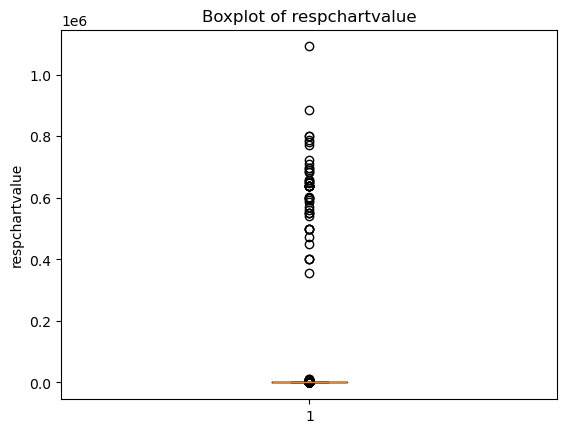

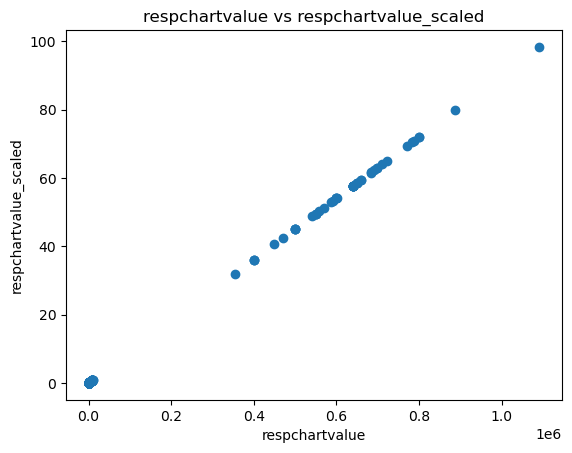

In [14]:
# Correlation matrix for numeric features
print(df.corr())

# Boxplot to check for outliers in respchartvalue
plt.boxplot(df['respchartvalue'].dropna())
plt.title('Boxplot of respchartvalue')
plt.ylabel('respchartvalue')
plt.show()

# If you want to see relationships between features, try a scatter plot:
# Example: respchartvalue vs respchartvalue_scaled
plt.scatter(df['respchartvalue'], df['respchartvalue_scaled'])
plt.xlabel('respchartvalue')
plt.ylabel('respchartvalue_scaled')
plt.title('respchartvalue vs respchartvalue_scaled')
plt.show()

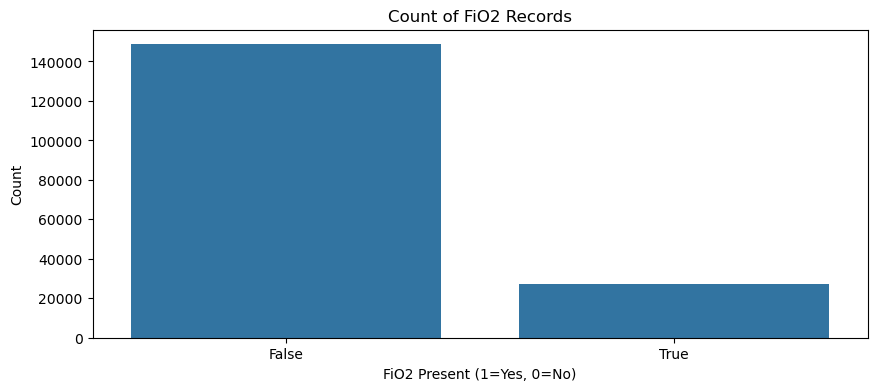

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Countplot for a categorical variable (e.g., one-hot encoded respchartvaluelabel)
plt.figure(figsize=(10,4))
sns.countplot(x='respchartvaluelabel_FiO2', data=df)
plt.title('Count of FiO2 Records')
plt.xlabel('FiO2 Present (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# 2. Boxplot for respchartvalue by a categorical variable (e.g., respcharttypecat)
# If you still have the original categorical column, use it. Otherwise, skip or use another.
# Example (if respcharttypecat exists):
# sns.boxplot(x='respcharttypecat', y='respchartvalue', data=df)
# plt.title('respchartvalue by Type')
# plt.show()

# 3. Pairplot for numeric features
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

# 4. Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example: Predicting respchartvalue (or use another target if needed)
# Drop rows with missing target values
df_model = df.dropna(subset=['respchartvalue'])

# Select features (drop target and any non-feature columns)
X = df_model.drop(['respchartvalue', 'respchartvalue_scaled'], axis=1, errors='ignore')
y = df_model['respchartvalue']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Print existing metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", np.mean(np.abs(y_test - y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual respchartvalue')
plt.ylabel('Predicted respchartvalue')
plt.title('Actual vs Predicted respchartvalue')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Random Forest R^2 Score:", r2_score(y_test, rf_pred))

# Compare predictions visually
plt.scatter(y_test, rf_pred, alpha=0.7, label='Random Forest')
plt.scatter(y_test, y_pred, alpha=0.7, label='Linear Regression')
plt.xlabel('Actual respchartvalue')
plt.ylabel('Predicted respchartvalue')
plt.title('Actual vs Predicted respchartvalue (Ensemble vs Linear)')
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['respchartvalue_scaled'] = scaler.fit_transform(df[['respchartvalue']])

In [11]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176089 entries, 0 to 176088
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   respchartid            176089 non-null  int64  
 1   patientunitstayid      176089 non-null  int64  
 2   respchartoffset        176089 non-null  int64  
 3   respchartentryoffset   176089 non-null  int64  
 4   respcharttypecat       176089 non-null  object 
 5   respchartvaluelabel    176089 non-null  object 
 6   respchartvalue         176089 non-null  float64
 7   respchartvalue_scaled  176089 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 10.7+ MB
None
   respchartid  patientunitstayid  respchartoffset  respchartentryoffset  \
0          107             184757             2922                  2922   
1         1108             187150              408                   408   
2        10629             179269              117              

In [12]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176089 entries, 0 to 176088
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   respchartid            176089 non-null  int64  
 1   patientunitstayid      176089 non-null  int64  
 2   respchartoffset        176089 non-null  int64  
 3   respchartentryoffset   176089 non-null  int64  
 4   respcharttypecat       176089 non-null  object 
 5   respchartvaluelabel    176089 non-null  object 
 6   respchartvalue         176089 non-null  float64
 7   respchartvalue_scaled  176089 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 10.7+ MB
None
   respchartid  patientunitstayid  respchartoffset  respchartentryoffset  \
0          107             184757             2922                  2922   
1         1108             187150              408                   408   
2        10629             179269              117              

In [13]:
# Shows summary statistics for all columns
print(df.describe(include='all'))

         respchartid  patientunitstayid  respchartoffset  \
count   1.760890e+05       1.760890e+05    176089.000000   
unique           NaN                NaN              NaN   
top              NaN                NaN              NaN   
freq             NaN                NaN              NaN   
mean    1.260332e+08       1.891008e+06      7168.550244   
std     7.654253e+07       1.026092e+06      9498.976967   
min     1.070000e+02       1.438700e+05    -24147.000000   
25%     5.667673e+07       9.100500e+05      1181.000000   
50%     1.352144e+08       1.998890e+06      3826.000000   
75%     1.863991e+08       2.873230e+06      9481.000000   
max     2.555675e+08       3.352333e+06     74892.000000   

        respchartentryoffset  respcharttypecat respchartvaluelabel  \
count          176089.000000            176089              176089   
unique                   NaN                 3                 172   
top                      NaN  respFlowSettings                FiO2   

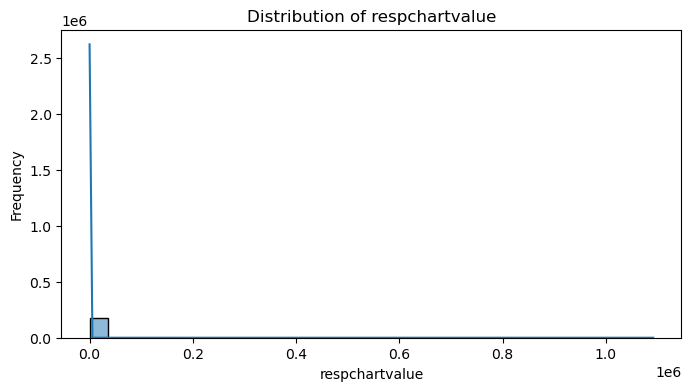

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['respchartvalue'], bins=30, kde=True)
plt.title('Distribution of respchartvalue')
plt.xlabel('respchartvalue')
plt.ylabel('Frequency')
plt.show()

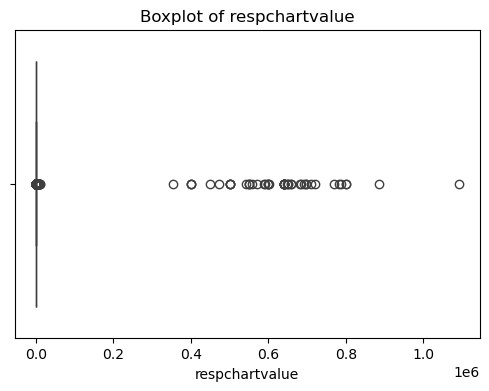

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['respchartvalue'])
plt.title('Boxplot of respchartvalue')
plt.xlabel('respchartvalue')
plt.show()

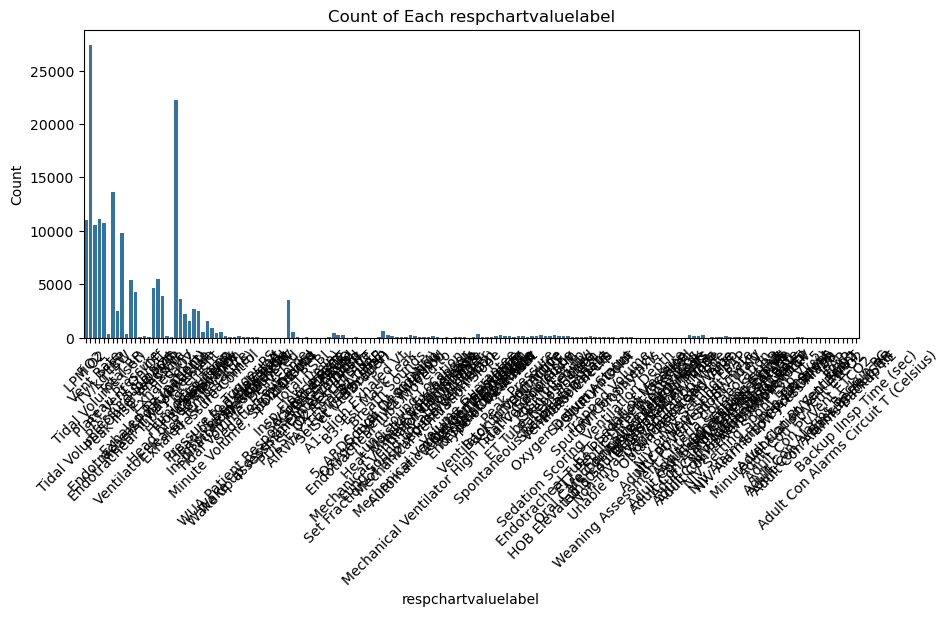

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x='respchartvaluelabel', data=df)
plt.title('Count of Each respchartvaluelabel')
plt.xlabel('respchartvaluelabel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

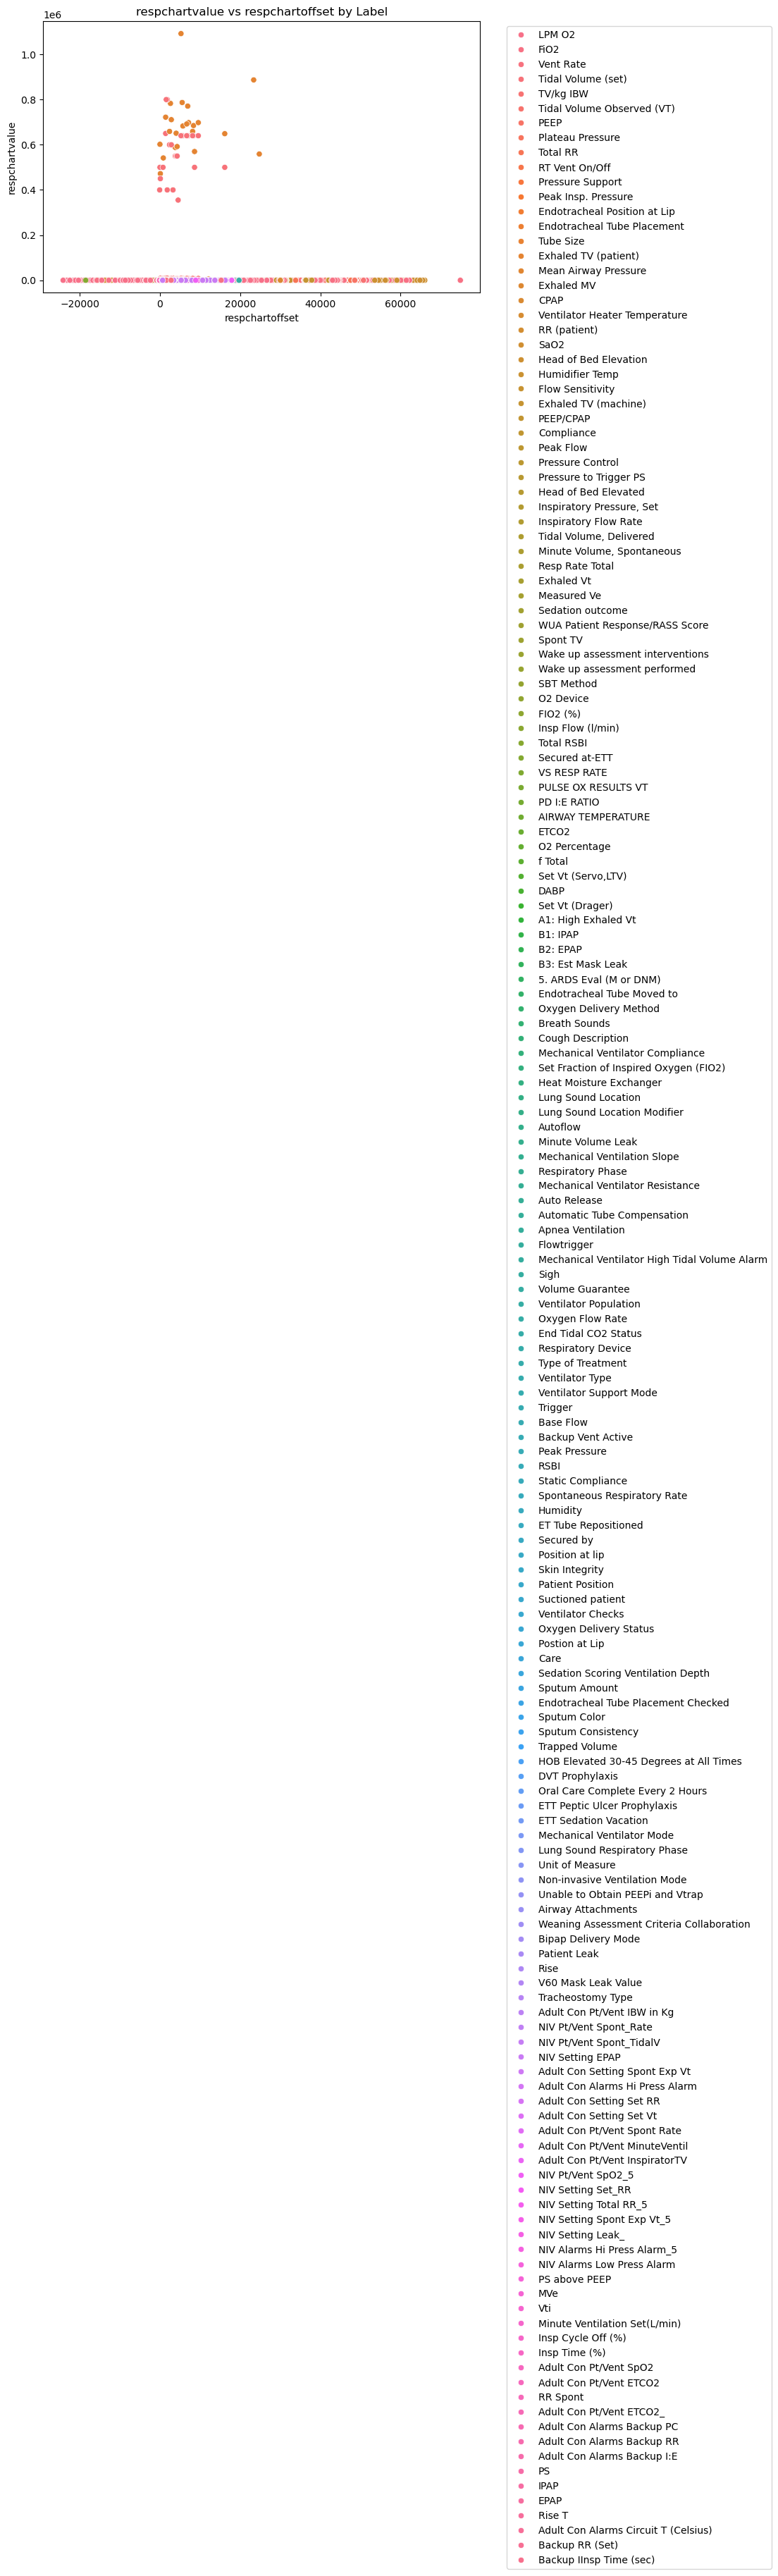

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='respchartoffset', y='respchartvalue', hue='respchartvaluelabel', data=df)
plt.title('respchartvalue vs respchartoffset by Label')
plt.xlabel('respchartoffset')
plt.ylabel('respchartvalue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

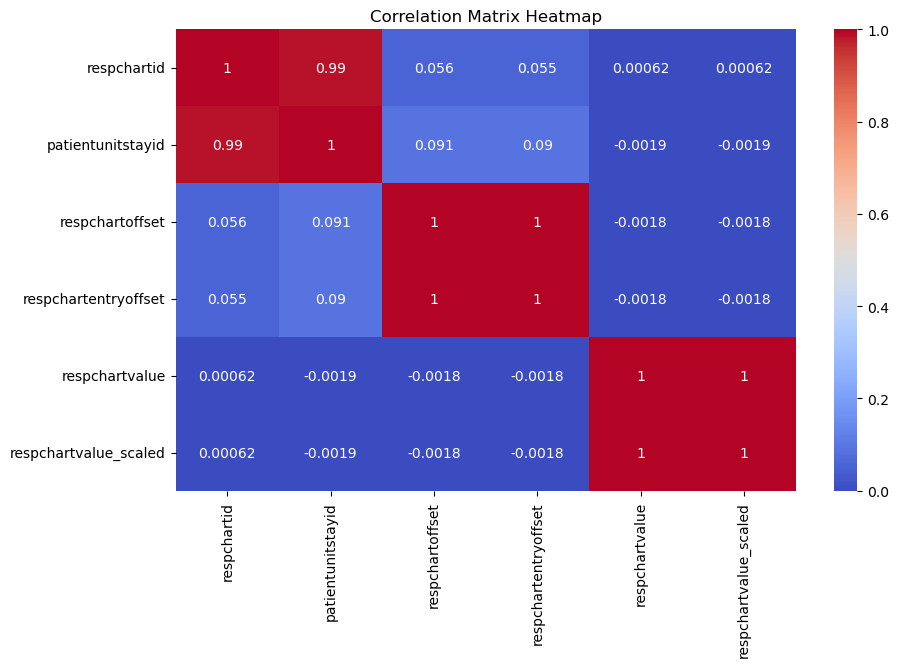

In [19]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Drop rows with missing target values
df_model = df.dropna(subset=['respchartvalue'])

# Select features (drop target and any non-feature columns)
X = df_model.drop(['respchartvalue', 'respchartvalue_scaled'], axis=1, errors='ignore')
y = df_model['respchartvalue']

# If X contains categorical columns, convert them to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 119263310.22347653
R^2 Score: 0.006469285813608172


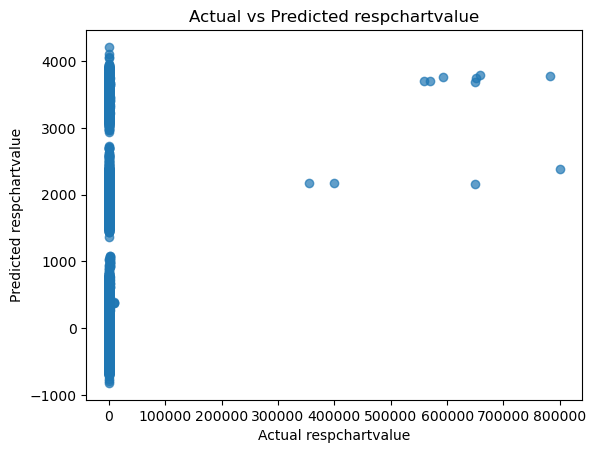

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual respchartvalue')
plt.ylabel('Predicted respchartvalue')
plt.title('Actual vs Predicted respchartvalue')
plt.show()

In [28]:
# Drop rows with missing target values
df_model = df.dropna(subset=['respchartvalue'])

# Select features (drop target and any non-feature columns)
X = df_model.drop(['respchartvalue', 'respchartvalue_scaled'], axis=1, errors='ignore')
y = df_model['respchartvalue']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 119263310.22347653
R^2 Score: 0.006469285813608172


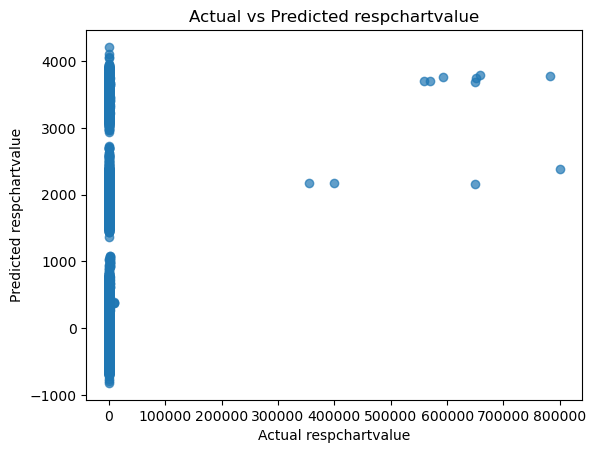

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual respchartvalue')
plt.ylabel('Predicted respchartvalue')
plt.title('Actual vs Predicted respchartvalue')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 119263310.22347653
Root Mean Squared Error (RMSE): 10920.774250183753
Mean Absolute Error (MAE): 515.8125616359185
R^2 Score: 0.006469285813608172


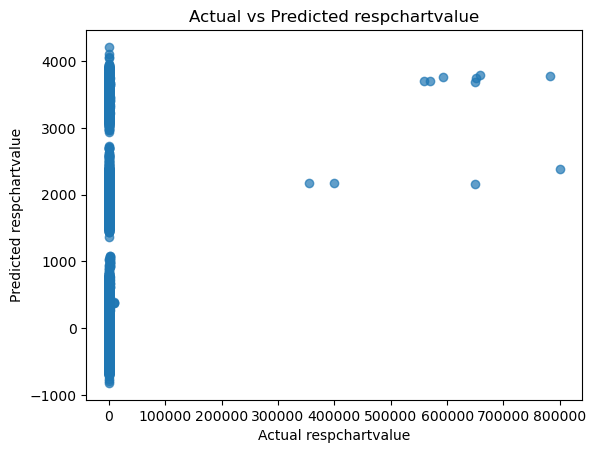

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual respchartvalue')
plt.ylabel('Predicted respchartvalue')
plt.title('Actual vs Predicted respchartvalue')
plt.show()

In [38]:
def load_and_clean_data(filepath):
    import pandas as pd
    df = pd.read_csv(filepath)
    # Fill missing numeric values with median, categorical with mode
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    # Convert 'respchartvalue' to numeric
    df['respchartvalue'] = pd.to_numeric(df['respchartvalue'], errors='coerce')
    df['respchartvalue'] = df['respchartvalue'].fillna(df['respchartvalue'].median())
    return df

# Usage
df = load_and_clean_data('respiratorycharting.csv')

In [39]:
def load_and_clean_data(filepath):
    import pandas as pd
    df = pd.read_csv(filepath)
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    df['respchartvalue'] = pd.to_numeric(df['respchartvalue'], errors='coerce')
    df['respchartvalue'] = df['respchartvalue'].fillna(df['respchartvalue'].median())
    return df

In [40]:
X = df.drop(['respchartvalue', 'respchartvalue_scaled'], axis=1, errors='ignore')
y = df['respchartvalue']
X = pd.get_dummies(X, drop_first=True)

In [41]:
def prepare_features(df):
    X = df.drop(['respchartvalue', 'respchartvalue_scaled'], axis=1, errors='ignore')
    y = df['respchartvalue']
    X = pd.get_dummies(X, drop_first=True)
    return X, y

In [42]:
def train_and_evaluate(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual respchartvalue')
    plt.ylabel('Predicted respchartvalue')
    plt.title('Actual vs Predicted respchartvalue')
    plt.show()

Mean Squared Error (MSE): 119263310.22347653
Root Mean Squared Error (RMSE): 10920.774250183753
Mean Absolute Error (MAE): 515.8125616359185
R^2 Score: 0.006469285813608172


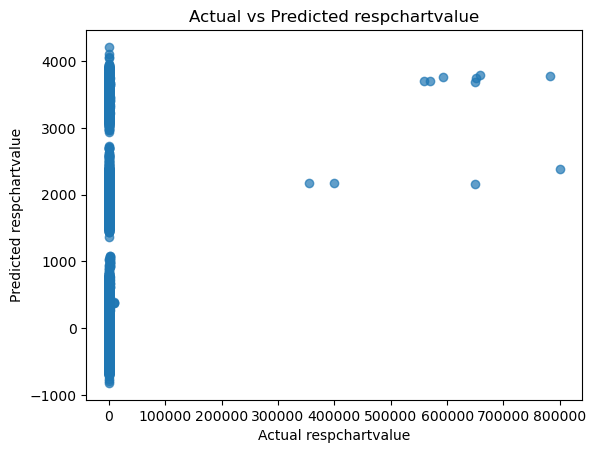

In [43]:
# Load and clean data
df = load_and_clean_data('respiratorycharting.csv')

# Prepare features and target
X, y = prepare_features(df)

# Train and evaluate model
train_and_evaluate(X, y)

In [49]:
def train_and_evaluate_ensemble(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    # Evaluate
    print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_pred))
    print("Random Forest R^2 Score:", r2_score(y_test, rf_pred))
    
    # Visualize
    plt.scatter(y_test, rf_pred, alpha=0.7, label='Random Forest')
    plt.xlabel('Actual respchartvalue')
    plt.ylabel('Predicted respchartvalue')
    plt.title('Actual vs Predicted respchartvalue (Random Forest)')
    plt.legend()
    plt.show()

Random Forest Mean Squared Error: 114282932.67648052
Random Forest R^2 Score: 0.04795864286661067


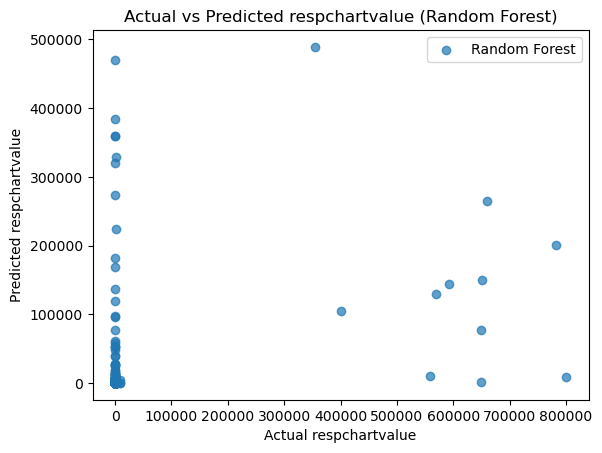

In [51]:
# Export cleaned DataFrame to CSV for Power BI
df.to_csv('cleaned_respiratorycharting.csv', index=False)

Creating a new notebook:
* **Import Libraries and Load Dataset**
* **Data Cleaning and Preprocessing**
* **Feature Engineering and Transformation**
* **Exploratory Data Analysis (EDA)**
* **Data Visualization**
* **Model Selection and Training**
* **Model Evaluation**
* **Custom Innovation: Advanced Feature or Ensemble Method**

